# Logistic Regression on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
def Sigmoid(x):
    expr=1/(1+np.exp(x))
    return expr

In [3]:
np.linspace(1,10) #returns 50 random numbers between 1 and 10

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [4]:
np.linspace(0.3,0.4,num=10) #returns 10 random numbers between 0.3 and 0.4

array([0.3       , 0.31111111, 0.32222222, 0.33333333, 0.34444444,
       0.35555556, 0.36666667, 0.37777778, 0.38888889, 0.4       ])

In [5]:
#Checkboard pattern
np.tile([[1,0],[0,1]],(4,4)) #using 0 and 1 
np.tile([['⬛','⬜'],['⬜','⬛']],(4,4))

array([['⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜'],
       ['⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛'],
       ['⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜'],
       ['⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛'],
       ['⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜'],
       ['⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛'],
       ['⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜'],
       ['⬜', '⬛', '⬜', '⬛', '⬜', '⬛', '⬜', '⬛']], dtype='<U1')

# Logistic Regression with titanic dataset

In [6]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA

<AxesSubplot:xlabel='survived', ylabel='count'>

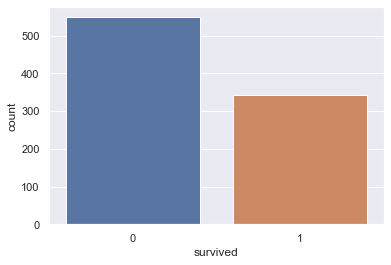

In [7]:
sns.countplot(x='survived',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

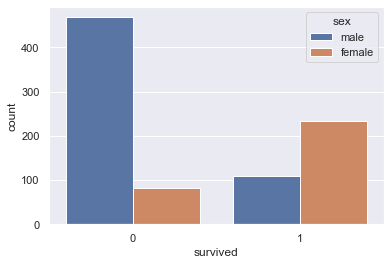

In [8]:
sns.countplot(x='survived',hue='sex',data=titanic)

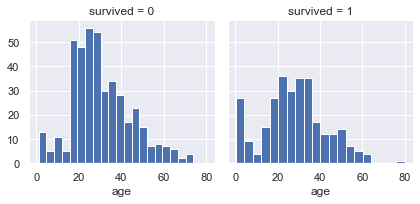

In [9]:
h = sns.FacetGrid(titanic, col = 'survived')
h.map(plt.hist, "age", bins = 20)

# Data Wrangling

In [11]:
titanic.isnull().any().sum()

4

In [12]:
titanic.dropna(inplace=True)

In [13]:
titanic.shape[0]

182

## Preprocessing

In [14]:
sex=pd.get_dummies(titanic['sex'],drop_first=True)
sex[:5]

,male
1,0
3,0
6,1
10,0
11,0


In [15]:
embark=pd.get_dummies(titanic['embarked'],drop_first=True)
embark[:5]

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [16]:
cl=pd.get_dummies(titanic['pclass'],drop_first=True)
cl[:5]

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [17]:
#Concatenate all three main columns
titanic=pd.concat([titanic,sex,cl,embark],axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,0,0,1


In [18]:
titanic.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'male', 2, 3, 'Q', 'S'], dtype=object)

In [19]:
titanic.drop(['pclass','sex','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
titanic.head()

,survived,age,sibsp,parch,fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


In [20]:
x=titanic.drop('survived',axis=1)
y=titanic['survived']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.73,random_state=101)

In [22]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

predictions=lr.predict(X_test)
predictions[:5]

C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be ra

array([1, 0, 0, 1, 0], dtype=int64)

In [23]:
np.array(y[:5])
print(classification_report(Y_test,predictions))
accuracy_score(Y_test,predictions)*100

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.81      0.85      0.83        34

    accuracy                           0.76        50
   macro avg       0.72      0.71      0.71        50
weighted avg       0.75      0.76      0.76        50



76.0

In [24]:
#Give the data and the model will predict the ans whether person survived or not 0 for not survived 1 for survived
print(lr.predict([['35','1','0','27.1000','1','0','0','1','0']]))
print(lr.predict([['35','1','0','51.1000','0','0','0','0','1']]))

[0]
[1]


C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [26]:
accuracy_score(Y_test, predictions)*100

76.0

## Image Classification

Predicting the Digits values from images

In [27]:
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Determine the total number of images and labels

In [29]:
print('Image Data shape = ',digits.data.shape)
print('Label data shape = ',digits.target.shape)

Image Data shape =  (1797, 64)
Label data shape =  (1797,)


Displaying some of the images with their labels

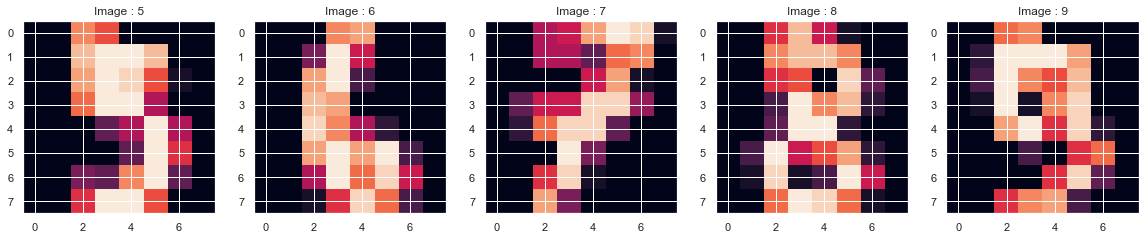

In [31]:
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[5:10], digits.target[5:10])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(8,8)))
    plt.title('Image : {}'.format(label))

Dataset splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=101)

In [33]:
print(X_train.shape, X_test.shape)

(1383, 64) (414, 64)


In [34]:
ld = LogisticRegression()
ld.fit(X_train, y_train)

C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
LogisticRegression()

LogisticRegression()

In [36]:
print(classification_report(y_test, ld.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.92      1.00      0.96        48
           2       1.00      0.97      0.98        33
           3       1.00      0.95      0.97        37
           4       1.00      0.94      0.97        51
           5       0.96      1.00      0.98        44
           6       1.00      0.97      0.99        35
           7       1.00      0.98      0.99        44
           8       0.98      0.93      0.95        45
           9       0.90      0.97      0.94        37

    accuracy                           0.97       414
   macro avg       0.97      0.97      0.97       414
weighted avg       0.97      0.97      0.97       414



In [37]:
predictions = ld.predict(X_test)

In [38]:
accuracy_score(y_test, predictions)*100

97.10144927536231

In [39]:
print(ld.predict(X_test[0:10]))

[7 4 7 9 1 7 5 7 1 0]


In [40]:
print(y_test[0:10])

[7 4 7 9 1 7 5 7 1 0]


In [41]:
index = 0
logre = []
for Predicted, actual in zip(predictions, y_test):
    if Predicted == actual:
        logre.append(index)
    index += 1

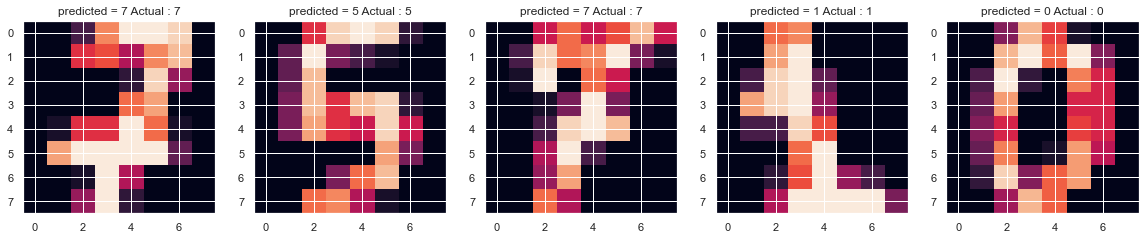

In [43]:
plt.figure(figsize = (20, 4))
for image, label in enumerate(logre[5:10]):
    plt.subplot(1, 5, image+1)
    plt.imshow(np.reshape(X_test[label], (8,8)))
    plt.title('predicted = {} Actual : {}'.format(predictions[label], y_test[label]))